<a href="https://colab.research.google.com/github/RyanPerrina/wine_classification/blob/main/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto Programmazione di Applicazioni Data Intensive
# Ryan Perrina e Manuel Luzietti

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# Descrizione del problema
Il dataset in questione riguarda le varianti di vino rosso portoghese "Vinho Verde". Il dataset descrive la qualità del vino in relazione ai componenti chimici presenti. L'obiettivo del progetto è predire la qualità del vino dai 
suoi componenti ovvero predire una variabile discreta non binaria.

In [4]:
data = pd.read_csv("WineQT.csv")

# Data Exploration

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Le features rappresentate:


*   fixed acidity | float 
*   volatile acidity | float 
*   citric acid	| float
*   residual sugar | float
*   chlorides | float
*   free sulfur dioxide	| float
*   total sulfur dioxide	| float
*   density | float
*   pH | float
*   sulphates | float
*   alcohol | float
*   quality | int
*   id | int


La variabile target è quality che assume valori da 0 a 10 con 0 qualità pessima e 10 eccellente. Id è l'identificatore dei record e verrà usato come indice del dataframe.

In [6]:
data.set_index("Id",inplace=True)

In [7]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Dal dataset possiamo notare che su alcune colonne abbiamo una variazione significativa tra media e 50 percentile, con alte std conme ad esempio "total sulfur dioxide"	oppure "free sulfur dioxide" questo significa che indica che ci sono valori particolarmente elevati agli estremi.
Si può notare anche che non sono stati rilevati vini con quality minore di 3 o maggiore di 8.

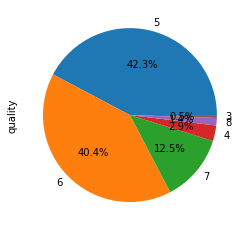

In [8]:
data["quality"].value_counts().plot.pie(autopct="%1.1f%%")

Dal grafico possiamo vedere che le classi sono sbilancite e potrebbero essere necessarie tecniche di bilanciamento. 

In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Come possiamo vedere non sono presenti valori nulli su nessuna colonna. Il numero di dati presenti nel data set è:

In [10]:
data.shape

(1143, 12)

abbiamo 1143 record e 12 features.

# Data exploration


In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

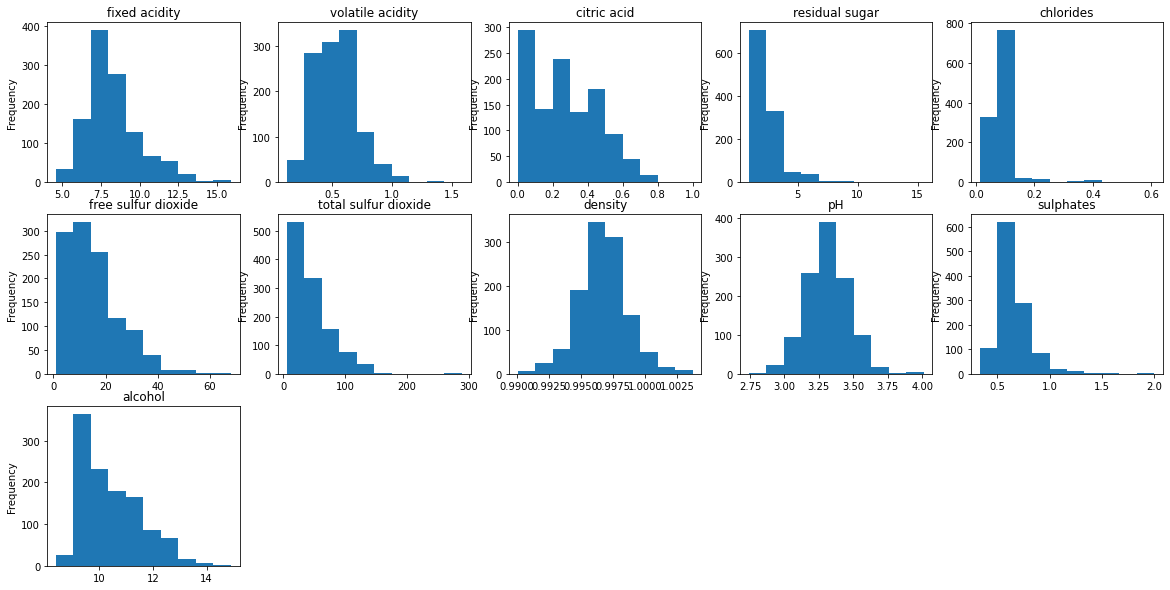

In [12]:
plt.figure(figsize=(20,10))
for i,col in enumerate(data.columns[:-1],start=1):
  data[col].plot.hist(ax=plt.subplot(3,5,i),title=col)
  

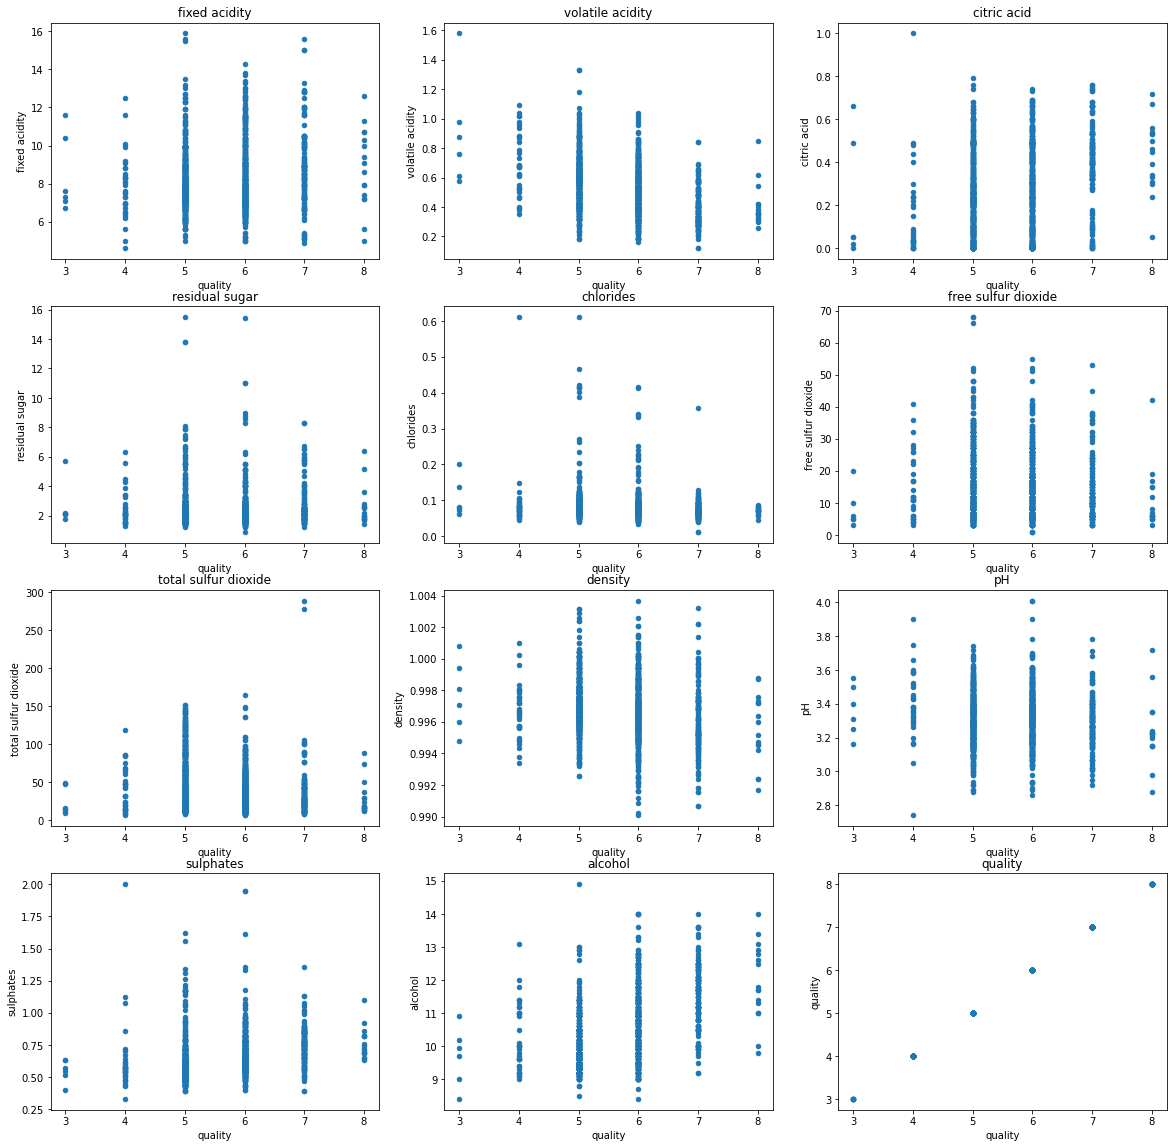

In [43]:
plt.figure(figsize=(20,20))
for i,col in enumerate(data[:-1],start=1):
  data.plot.scatter(x="quality",y=col,ax=plt.subplot(4,3,i),title=col)

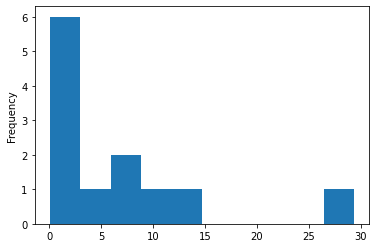

In [36]:
data.where(data["quality"]==8)

Costruiamo ora la matrice degli indici di correlazione tra le varie features.

In [47]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


Dalla tabella si possono notare alcune dipenze tra la variabili di input, che verranno gestite in seguito.

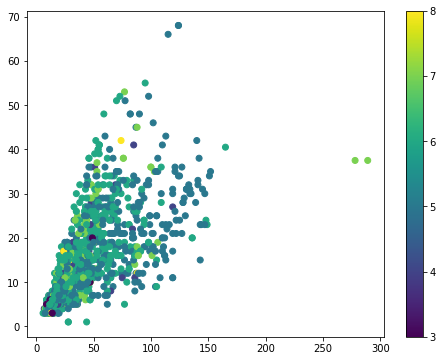

In [114]:
plt.figure(figsize=(8,6))
a=plt.scatter(data["total sulfur dioxide"],data["free sulfur dioxide"],c=data["quality"])
#plt.scatter(data["fixed acidity"],data["pH"],c=data["quality"])
plt.colorbar(a)


Puliamo la tabella dai valori non interessanti e ordianiamo i valori linearmente correlati con la features quality:

In [95]:
data.corr()["quality"].drop(labels="quality").abs().sort_values(ascending=False)

alcohol                 0.484866
volatile acidity        0.407394
sulphates               0.257710
citric acid             0.240821
total sulfur dioxide    0.183339
density                 0.175208
chlorides               0.124085
fixed acidity           0.121970
free sulfur dioxide     0.063260
pH                      0.052453
residual sugar          0.022002
Name: quality, dtype: float64

Possiamo notare che le prime quattro features che compaiono sono alcohol, volatile acidity, sulphates, citric acid. Questo significa che queste features sono quelle con un riscontro più rilavanti sulla qualità del vino.                     

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


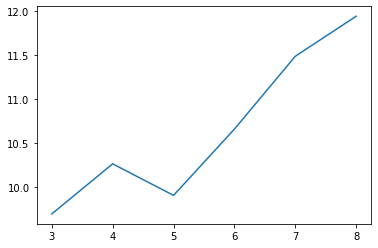

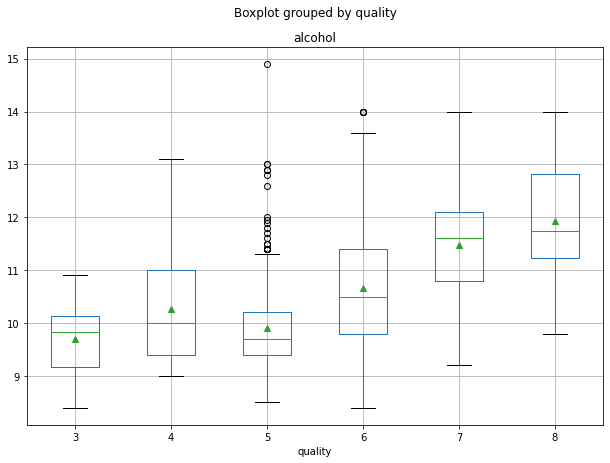

In [88]:
plt.plot(data.groupby("quality")["alcohol"].mean().index,data.groupby("quality")["alcohol"].mean())
data.boxplot(column="alcohol", by ="quality",showmeans=True,figsize=(10,7))

La correlazine tra alcohol e qualità è direttamnete proporzionale.L'indice di correllazione infatti è:


In [96]:
data.corr().loc["quality","alcohol"]

0.48486621180851264

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


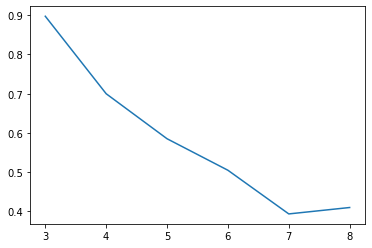

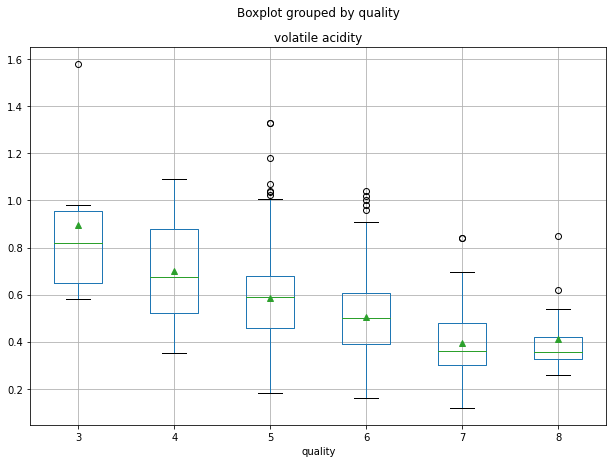

In [90]:
plt.plot(data.groupby("quality")["volatile acidity"].mean().index,data.groupby("quality")["volatile acidity"].mean())
data.boxplot(column="volatile acidity", by ="quality",showmeans=True,figsize=(10,7))

La correlazine tra volatile acidity e qualità è inversamente proporzionale.L'indice di correllazione infatti è:

In [ ]:
data.corr().loc["quality"," volatile acidity"]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


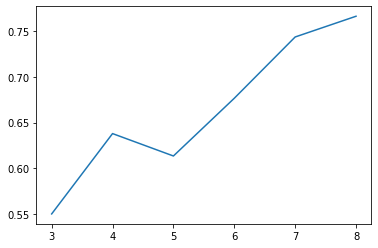

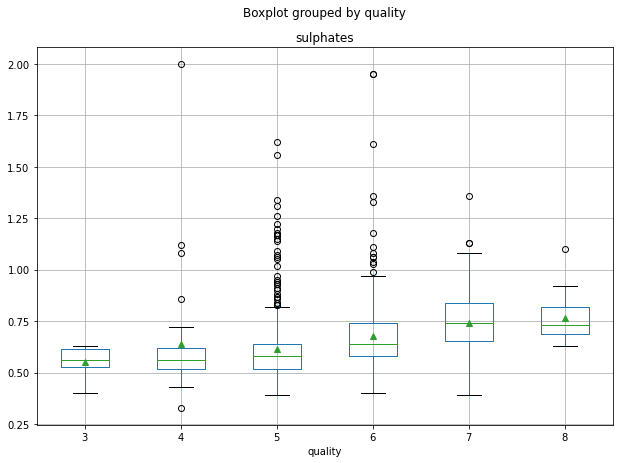

In [91]:
plt.plot(data.groupby("quality")["sulphates"].mean().index,data.groupby("quality")["sulphates"].mean())
data.boxplot(column="sulphates", by ="quality",showmeans=True,figsize=(10,7))

La correlazine tra sulphates e qualità è direttamente proporzionale.L'indice di correllazione infatti è:



In [98]:
data.corr().loc["quality","sulphates"]

0.2577102599306222

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


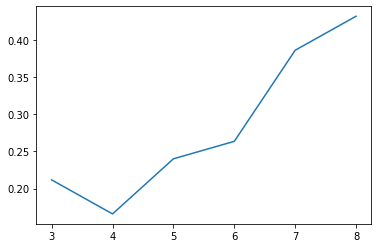

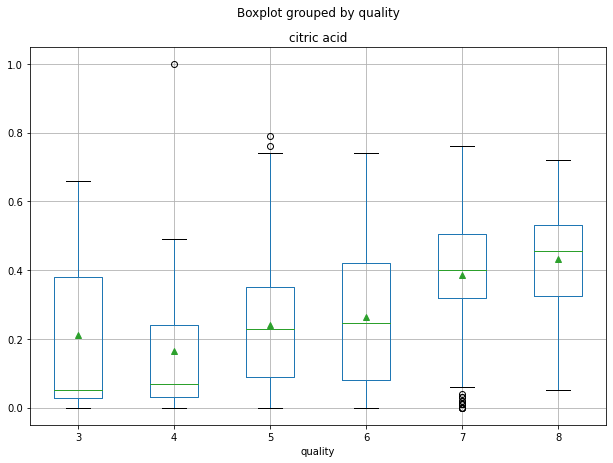

In [94]:
plt.plot(data.groupby("quality")["citric acid"].mean().index,data.groupby("quality")["citric acid"].mean())
data.boxplot(column="citric acid", by ="quality",showmeans=True,figsize=(10,7))

La correlazine tra citric acid e qualità è direttamente proporzionale.L'indice di correllazione infatti è:

In [100]:
data.corr().loc["quality","citric acid"]

0.24082083714719305